In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('DS01.csv')
data

,발화,감정_int
0,언니 동생으로 부르는게 맞는 일인가요..??,0
1,그냥 내 느낌일뿐겠지?,0
2,아직너무초기라서 그런거죠?,0
3,유치원버스 사고 낫다던데,0
4,근데 원래이런거맞나요,0
...,...,...
14129,"봐봐, 이거 너무 복실복실하지?",1
14130,"하긴 남자애니까. 별로 관심 없으려나? 그래도 여기 남성 의류 말야, 평판이 꽤 좋...",1
14131,이럴 땐 진짜 질색하는 표정이 된다니깐. 감탄스럽기까지 해.,1
14132,"너무 대놓고 그러면 역효과잖니? 난 지금 이대로면 충분한걸. ……하긴, 옛날엔 페어...",1


In [6]:
data['발화'].nunique(), data['감정_int'].nunique()
data.isnull().sum()
data.drop_duplicates(subset = ["발화"], inplace = True)
# NULL 값을 확인하고 중복값을 제거해주었습니다.

In [7]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")
shop_data = pd.read_table('ratings_total.txt', names=['ratings', '발화'])
print('전체 리뷰 개수 :',len(shop_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 200000


In [8]:
shop_data['감정_int'] = np.select([shop_data.ratings > 3], [1], default=0)
shop_data[4000:4005]

,ratings,발화,감정_int
4000,5,스타일이좋은것같아요😁👍,1
4001,2,싸구려같아요...... 한번을 못차고 끈어져버림..,0
4002,2,해외에 있어서 한국 나간김에 주문해서 가지고 왔는데 원했던 맛이 아니에요. 작년에 ...,0
4003,5,향도 좋고 모양도 예뻐요.,1
4004,1,다시는 네이버에서 과일은 사지않을듯,0


In [9]:
shop_data['ratings'].nunique(), shop_data['발화'].nunique(), shop_data['감정_int'].nunique()

(4, 199908, 2)

In [10]:
shop_data.drop_duplicates(subset=['발화'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(shop_data))

총 샘플의 수 : 199908


In [11]:
print(shop_data.isnull().values.any())

False


In [12]:
shop_data = shop_data.drop(['ratings'], axis = 1)
shop_data

,발화,감정_int
0,배공빠르고 굿,1
1,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...
199995,장마라그런가!!! 달지않아요,0
199996,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,넘이쁘고 쎄련되보이네요~,1


In [13]:
Data = pd.concat([data, shop_data])

In [14]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

movie1_data = pd.read_table('ratings_train.txt')
movie2_data = pd.read_table('ratings_test.txt')

#쓸모없는 행 삭제
movie1_data = movie1_data.drop(['id'], axis=1)
movie2_data = movie2_data.drop(['id'], axis=1)

#행 이름 맞춰줌
movie1_data.columns=['발화', '감정_int']
movie2_data.columns=['발화', '감정_int']

#데이터 합체
Data = pd.concat([Data, movie1_data, movie2_data])

In [15]:
train, test = train_test_split(Data, test_size=0.1, random_state=210617)
print('훈련용 리뷰의 개수 :', len(train))
print('테스트용 리뷰의 개수 :', len(test))

훈련용 리뷰의 개수 : 372584
테스트용 리뷰의 개수 : 41399


   감정_int   count
0       0  186188
1       1  186396


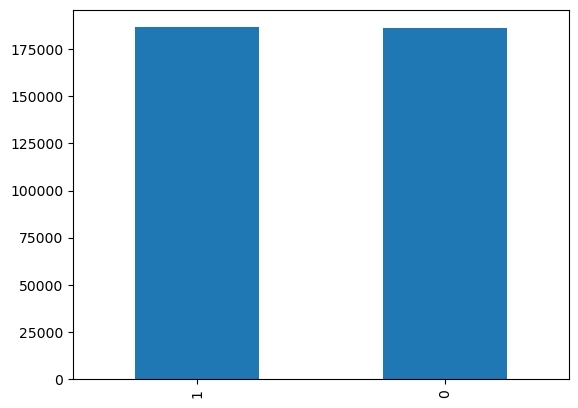

In [16]:
train['감정_int'].value_counts().plot(kind = 'bar')
print(train.groupby('감정_int').size().reset_index(name = 'count'))

In [21]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']
okt = Okt()

In [22]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(t_train)
tokenizer.fit_on_texts(t_test)

In [23]:
import pickle
 
## Save pickle
with open("movieshopping.pickle","wb") as fw:
    pickle.dump(tokenizer, fw)

In [24]:
threshold = 1
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt) * 100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq) * 100)

단어 집합(vocabulary)의 크기 : 1104
등장 빈도가 0번 이하인 희귀 단어의 수: 0
단어 집합에서 희귀 단어의 비율: 0.0
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.0


In [25]:
t_train1 = tokenizer.texts_to_sequences(t_train)
t_test1 = tokenizer.texts_to_sequences(t_test)

In [26]:
e_train = train['감정_int']
e_test = test['감정_int']

문장의 최대 길이 : 39
문장의 평균 길이 : 11.521739130434783


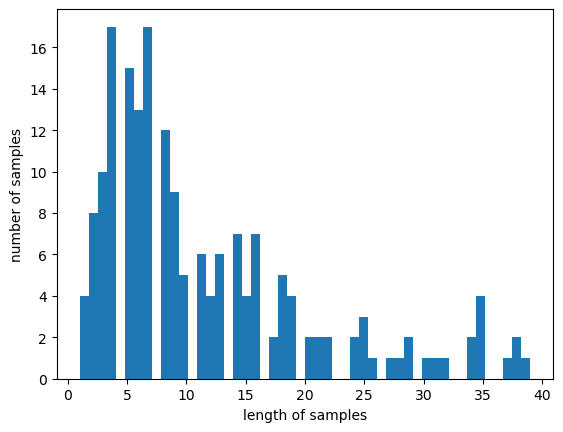

In [27]:
print('문장의 최대 길이 :',max(len(l) for l in t_train1))
print('문장의 평균 길이 :',sum(map(len, t_train1))/len(t_train1))
plt.hist([len(s) for s in t_train1], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))
 
 
max_len = 42
below_threshold_len(max_len, t_train1)

전체 샘플 중 길이가 42 이하인 샘플의 비율: 100.0
